In [2]:
from __future__ import print_function
__author__='sverma'

import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

/Users/sachinv/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
DATA_DIR= os.getenv ('PUI2015')+'/notebooks/data/'
JAN_14= DATA_DIR + '2014-01 - Citi Bike trip data.csv'
FEB_14= DATA_DIR + '2014-02 - Citi Bike trip data.csv'
MAR_14= DATA_DIR + '2014-03 - Citi Bike trip data.csv'
APR_14= DATA_DIR + '2014-04 - Citi Bike trip data.csv'
MAY_14= DATA_DIR + '2014-05 - Citi Bike trip data.csv'
JUN_14= DATA_DIR + '2014-06 - Citi Bike trip data.csv'
JUL_14= DATA_DIR + '2014-07 - Citi Bike trip data.csv'
AUG_14= DATA_DIR + '2014-08 - Citi Bike trip data.csv'
SEP_14= DATA_DIR + '201409-citibike-tripdata.csv'
OCT_14= DATA_DIR + '201410-citibike-tripdata.csv'
NOV_14= DATA_DIR + '201411-citibike-tripdata.csv'
DEC_14= DATA_DIR + '201412-citibike-tripdata.csv'



In [5]:
df = pd.read_csv(DEC_14)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,16047,Customer,NaN,0
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,498,Broadway & W 32 St,40.748549,-73.988084,546,E 30 St & Park Ave S,40.744449,-73.983035,18472,Subscriber,1988,2
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19589,Subscriber,1983,1
3,1126,12/1/2014 00:02:17,12/1/2014 00:21:03,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,21142,Customer,NaN,0
4,331,12/1/2014 00:02:21,12/1/2014 00:07:52,519,Pershing Square North,40.751873,-73.977706,527,E 33 St & 2 Ave,40.744023,-73.976056,18679,Subscriber,1986,2


In [6]:
df['ageM'] = 2015-df['birth year'][(df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['gender'] == 2)]


In [7]:
bins = np.arange(10, 99, 10)
print (bins)

[10 20 30 40 50 60 70 80 90]


In [8]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero])
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero])
print (csM)
print (csF)

          count_nonzero
ageM                   
(10, 20]           3519
(20, 30]          70792
(30, 40]          95191
(40, 50]          72324
(50, 60]          47122
(60, 70]          14835
(70, 80]           2086
(80, 90]             97
          count_nonzero
ageF                   
(10, 20]            866
(20, 30]          21599
(30, 40]          23362
(40, 50]          15711
(50, 60]          11757
(60, 70]           2829
(70, 80]            236
(80, 90]             11


In [9]:
#csM.index
#csM.add_suffix('_count').reset_index()
#csF.add_suffix('_count').reset_index()

#print(csM)
d = {'Male':csM.count_nonzero, 'Female':csF.count_nonzero}
df2 = pd.DataFrame(data=d)
df2.reset_index()
print(df2)
#df3 = pd.DataFrame()
#df3['pM'] = (df2['Male']*100)/(df2['Male'] + df2['Female'])
#df3['pF'] = (df2['Female']*100)/(df2['Male'] + df2['Female'])
#df3

          Female   Male
ageF                   
(10, 20]     866   3519
(20, 30]   21599  70792
(30, 40]   23362  95191
(40, 50]   15711  72324
(50, 60]   11757  47122
(60, 70]    2829  14835
(70, 80]     236   2086
(80, 90]      11     97


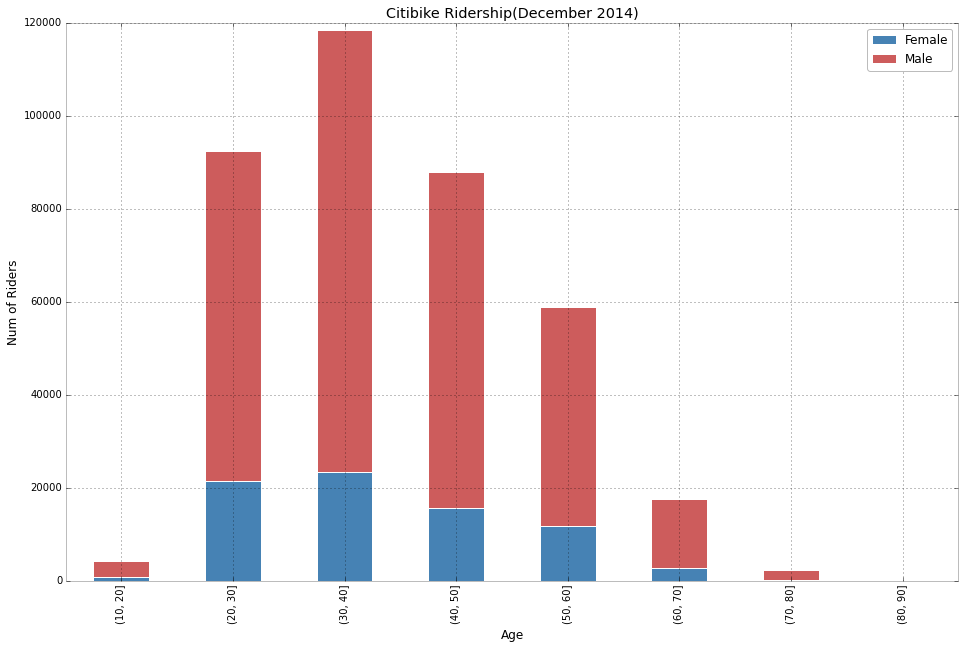

In [10]:
#csM.index
#help(plt.figure)
fig = plt.figure(figsize(16,10))
ax=fig.add_subplot(111)

df2.plot(kind='bar', stacked=True,ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Num of Riders')
ax.set_title('Citibike Ridership(December 2014)')
